In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import keras
import pandas as pd
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , Dropout , MaxPooling2D , Flatten
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
from tensorflow.keras import datasets
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator , array_to_img , img_to_array , load_img
from matplotlib import rc
%matplotlib inline
rc("font" , family = "AppleGothic")
plt.rcParams["axes.unicode_minus"] = False

In [40]:
carpic = ImageDataGenerator(
    rotation_range = 20 ,
    width_shift_range = 0.2 ,
    height_shift_range = 0.2 ,
    shear_range = 0.2 ,
    zoom_range = 0.2 ,
    horizontal_flip = True , 
    fill_mode = "nearest")

img = load_img("/Users/panhong/Desktop/car/마세라티/마세라티.1.jpeg")
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x.shape

# i = 0
# for batch in carpic.flow(x , batch_size = 1 , save_to_dir = "/Users/panhong/Desktop/자동차" ,
#                         save_prefix = "마세라티" , save_format = "jpeg"):
#     i += 1
#     if i > 10:
#         break

(1, 255, 340, 3)

In [48]:
rootpath = "/Users/panhong/Desktop"

imageGenerator = ImageDataGenerator(
    rescale = 1. / 255 ,
    rotation_range = 20 ,
    width_shift_range = 0.2 ,
    height_shift_range = 0.2,
    brightness_range = [1.0 , 1.0],
    horizontal_flip = True ,
    validation_split = 0.2 ,
    fill_mode = "nearest"
)

trainGen = imageGenerator.flow_from_directory(
    os.path.join(rootpath , "car" ),
    target_size = (128 , 128),
    class_mode = "binary",
    subset = "training"
)

validationGen = imageGenerator.flow_from_directory(
    os.path.join(rootpath , "car"),
    target_size = (128 ,128),
    class_mode = "binary",
    subset = "validation"
)

Found 63 images belonging to 4 classes.
Found 15 images belonging to 4 classes.


In [54]:
model = Sequential()
model.add(Conv2D(64 , kernel_size = (3 , 3) , input_shape = (128 , 128 , 3) , activation = "relu"))
model.add(Conv2D(64 , (3 , 3) , activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128 , activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(3 , activation = "softmax"))
model.compile(loss = "sparse_categorical_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

Model_dir = "./model_car/"
if not os.path.exists(Model_dir):
    os.mkdir(Model_dir)
modelpath = "./model_car/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath = modelpath , monitor = "val_loss" , verbose = 1 , save_best_only = True)
early_stop = EarlyStopping(monitor = "val_loss" , patience = 100)

epochs = 150
history = model.fit(
    trainGen , 
    epochs = epochs , 
    steps_per_epoch = (trainGen.samples * 400) / epochs ,
    validation_data = validationGen ,
    validation_steps = (validationGen.samples * 400) / epochs ,
    callbacks = [checkpoint , early_stop]
)

print("\nAccuracy : " , model.evaluate(validationGen)[1])

Epoch 1/150
168/168 [==============================] - 3s 9ms/step - loss: 1.3414 - accuracy: 0.2381 - val_loss: 2.2608 - val_accuracy: 0.2667

Epoch 00001: val_loss improved from inf to 2.26079, saving model to ./model_car/01-2.2608.hdf5
1/1 [==============================] - 0s 360ms/step - loss: 2.1554 - accuracy: 0.2667

Accuracy :  0.2666666805744171


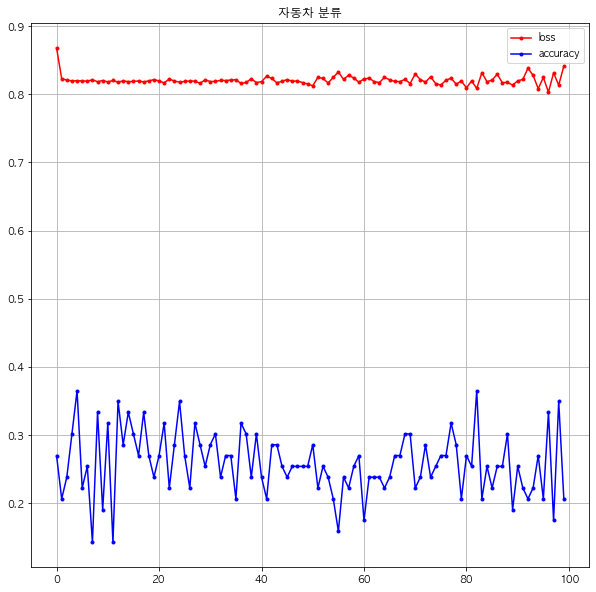

In [43]:
loss = history.history["loss"]
vloss = history.history["val_loss"]
accuracy = history.history["accuracy"]

x_len = np.arange(len(vloss))

plt.figure(figsize = (10 , 10))
plt.plot(x_len , loss , marker = "." , c = "red" , label = "loss")
plt.plot(x_len , accuracy , marker = "." , c = "blue" , label = "accuracy")
plt.title("자동차 분류")
plt.grid(True)
plt.legend()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 126, 126, 64)      1792      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 246016)            0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               31490176  
_________________________________________________________________
dropout_25 (Dropout)         (None, 128)             

/Users/panhong/miniforge3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


마세라티 : 예측 = 마세라티
마세라티 : 예측 = 페라리
마세라티 : 예측 = 페라리
마세라티 : 예측 = 페라리
마세라티 : 예측 = 페라리
마세라티 : 예측 = 페라리
마세라티 : 예측 = 페라리
마세라티 : 예측 = 페라리
마세라티 : 예측 = 페라리
마세라티 : 예측 = 페라리
페라리 : 예측 = 페라리
페라리 : 예측 = 페라리
페라리 : 예측 = 페라리
페라리 : 예측 = 페라리
페라리 : 예측 = 페라리
페라리 : 예측 = 페라리
페라리 : 예측 = 페라리
페라리 : 예측 = 페라리
페라리 : 예측 = 마세라티
페라리 : 예측 = 페라리


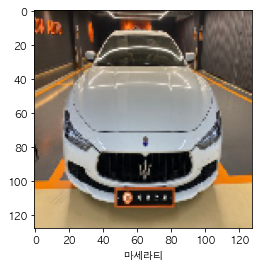

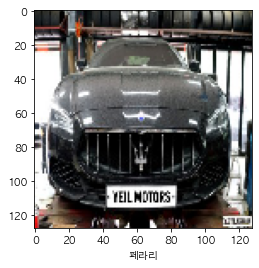

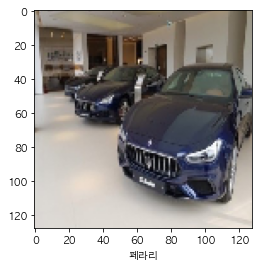

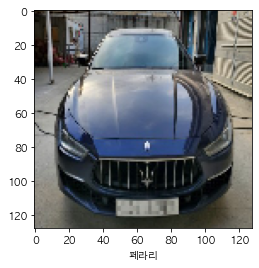

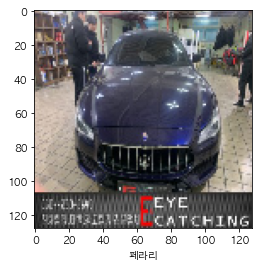

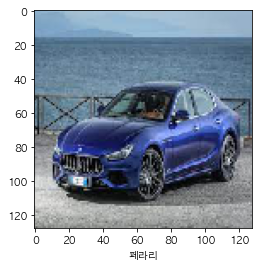

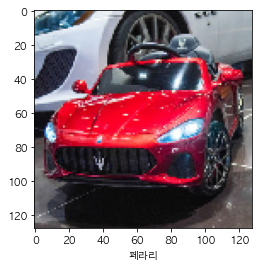

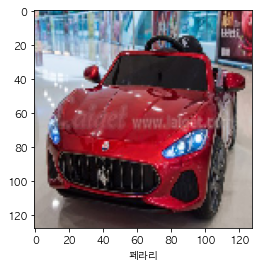

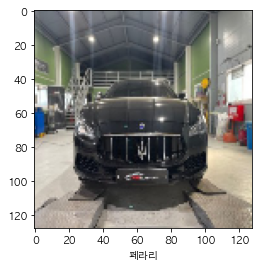

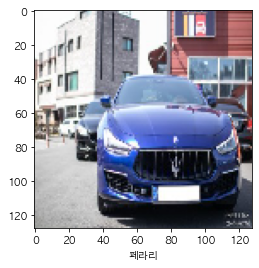

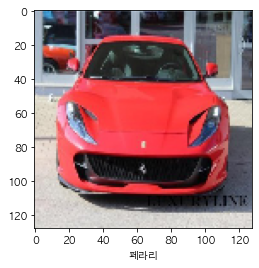

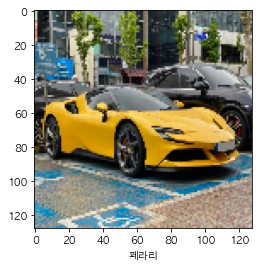

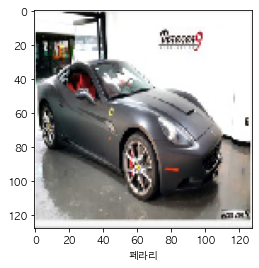

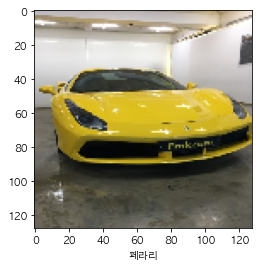

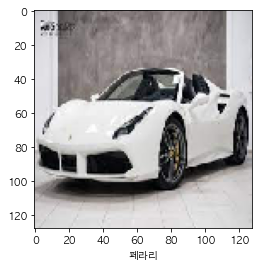

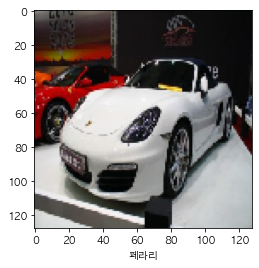

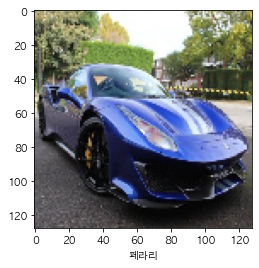

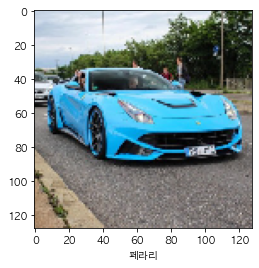

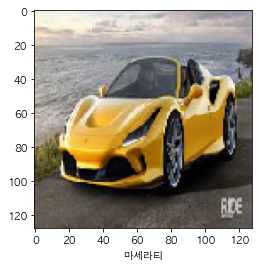

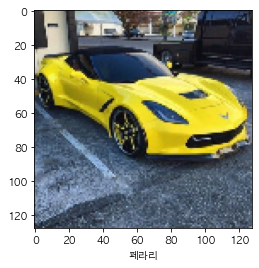

In [45]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model_data = load_model("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/model_car/01-1.0892.hdf5")
model.summary()

column = ["페라리" , "마세라티" , "포르쉐"]

n = 20
test_pic = [[0] * n for _ in range(n)]

for i in range(10):
    pic_name = "마세라티." + str(i + 1)
    file_path = "/Users/panhong/Desktop/car/마세라티/" + pic_name + ".jpeg"
    print(file_path)
    test_pic[i] = image.load_img(file_path , target_size = (128 ,128))
for i in range(10 , 20):
    pic_name = "페라리." + str(i - 9)
    file_path = "/Users/panhong/Desktop/car/페라리/" + pic_name + ".jpeg"
    print(file_path)
    test_pic[i] = image.load_img(file_path , target_size = (128 ,128))
# for i in range(20 , 30):
#     pic_name = "포르쉐." + str(i - 19)
#     file_path = "/Users/panhong/Desktop/car/포르쉐/" + pic_name + ".jpeg"
#     print(file_path)
#     test_pic[i] = image.load_img(file_path , target_size = (128 ,128))

for i in range(20):
    plt.figure()
    plt.imshow(test_pic[i])
    
    test_pic[i] = image.img_to_array(test_pic[i])
    test_pic[i] = np.expand_dims(test_pic[i] , axis = 0)
    result = model.predict_classes(test_pic[i])
    
    if result == 0:
        strName = "마세라티"
    else:
        strName = "페라리"
    plt.xlabel(strName)
    
    if i < 10:
        if result == 0:
            print("마세라티 : 예측 = 마세라티")
        else:
            print("마세라티 : 예측 = 페라리")
            
    else:
        if result == 0:
            print("페라리 : 예측 = 마세라티")
        else:
            print("페라리 : 예측 = 페라리")

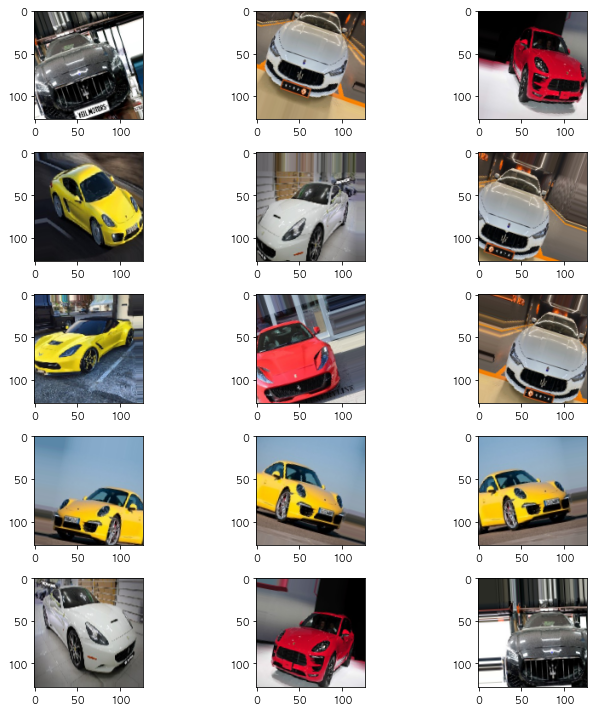

In [50]:
# pyplot를 이용해서 샘플데이터(학습데이터) 확인
plt.figure(figsize = (10 ,10))
for i in range(0 , 15):
    plt.subplot(5 , 3 , i + 1)
    for xBatch , yBatch in validationGen:
        image = xBatch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()